In [53]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import f_oneway
import pyodbc 

import warnings
warnings.filterwarnings("ignore")

In [2]:
conn_str = (
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=DESKTOP-P4G0C3D\SQLEXPRESS;'
    'DATABASE=INSTANT;'
    'Trusted_Connection=yes;'
)


In [3]:
conn = pyodbc.connect(conn_str)

In [4]:
query = "SELECT * FROM dbo.shopping_trends"
df = pd.read_sql(query, conn)

df 

,Customer_ID,Age,Gender,Item_Purchased,Category,Purchase_Amount_USD,Location,Size,Color,Season,Review_Rating,Subscription_Status,Payment_Method,Shipping_Type,Discount_Applied,Promo_Code_Used,Previous_Purchases,Preferred_Payment_Method,Frequency_of_Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,3896,40,Female,Hoodie,Clothing,28,Virginia,L,Turquoise,Summer,4.2,No,Cash,2-Day Shipping,No,No,32,Venmo,Weekly
3896,3897,52,Female,Backpack,Accessories,49,Iowa,L,White,Spring,4.5,No,PayPal,Store Pickup,No,No,41,Bank Transfer,Bi-Weekly
3897,3898,46,Female,Belt,Accessories,33,New Jersey,L,Green,Spring,2.9,No,Credit Card,Standard,No,No,24,Venmo,Quarterly
3898,3899,44,Female,Shoes,Footwear,77,Minnesota,S,Brown,Summer,3.8,No,PayPal,Express,No,No,24,Venmo,Weekly


In [5]:
df.shape

(3900, 19)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item_Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase_Amount_USD       3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review_Rating             3900 non-null   float64
 11  Subscription_Status       3900 non-null   object 
 12  Payment_Method            3900 non-null   object 
 13  Shipping_Type             3900 non-null   object 
 14  Discount

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,Customer_ID,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


In [9]:
df.isna().sum()

Customer_ID                 0
Age                         0
Gender                      0
Item_Purchased              0
Category                    0
Purchase_Amount_USD         0
Location                    0
Size                        0
Color                       0
Season                      0
Review_Rating               0
Subscription_Status         0
Payment_Method              0
Shipping_Type               0
Discount_Applied            0
Promo_Code_Used             0
Previous_Purchases          0
Preferred_Payment_Method    0
Frequency_of_Purchases      0
dtype: int64

# Outlier Detection

In [10]:
for i in df.columns:
    if df[i].dtype != 'object' and i != 'Customer_ID':
        fig = px.box(df, x=i,template='plotly_white')
        fig.show()


In [11]:
for col in df.columns:
    print(f"{col}: {df[col].dtype}, is_numeric: {pd.api.types.is_numeric_dtype(df[col])}")


Customer_ID: int64, is_numeric: True
Age: int64, is_numeric: True
Gender: object, is_numeric: False
Item_Purchased: object, is_numeric: False
Category: object, is_numeric: False
Purchase_Amount_USD: int64, is_numeric: True
Location: object, is_numeric: False
Size: object, is_numeric: False
Color: object, is_numeric: False
Season: object, is_numeric: False
Review_Rating: float64, is_numeric: True
Subscription_Status: object, is_numeric: False
Payment_Method: object, is_numeric: False
Shipping_Type: object, is_numeric: False
Discount_Applied: object, is_numeric: False
Promo_Code_Used: object, is_numeric: False
Previous_Purchases: int64, is_numeric: True
Preferred_Payment_Method: object, is_numeric: False
Frequency_of_Purchases: object, is_numeric: False


In [12]:
for i in df.columns:
    if df[i].dtype in ['int64', 'float64'] and i != 'Customer_ID':
        Q1 = df[i].quantile(0.25)
        Q3 = df[i].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[i] < lower_bound) | (df[i] > upper_bound)]
        print(f"{i}: Number of outliers = {outliers.shape[0]}")


Age: Number of outliers = 0
Purchase_Amount_USD: Number of outliers = 0
Review_Rating: Number of outliers = 0
Previous_Purchases: Number of outliers = 0


In [13]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts(),'\n')
    

Gender
Male      2652
Female    1248
Name: count, dtype: int64 

Item_Purchased
Blouse        171
Pants         171
Jewelry       171
Shirt         169
Dress         166
Sweater       164
Jacket        163
Coat          161
Sunglasses    161
Belt          161
Sandals       160
Socks         159
Skirt         158
Scarf         157
Shorts        157
Hat           154
Handbag       153
Hoodie        151
Shoes         150
T-shirt       147
Sneakers      145
Boots         144
Backpack      143
Gloves        140
Jeans         124
Name: count, dtype: int64 

Category
Clothing       1737
Accessories    1240
Footwear        599
Outerwear       324
Name: count, dtype: int64 

Location
Montana           96
California        95
Idaho             93
Illinois          92
Alabama           89
Minnesota         88
New York          87
Nevada            87
Nebraska          87
Delaware          86
Maryland          86
Vermont           85
Louisiana         84
North Dakota      83
West Virginia     81
M

# Purchase Amount Vs. Gender

In [14]:
purchase_info = df.groupby('Gender').agg(
    total_purchase_per_gender = ('Purchase_Amount_USD', 'sum'),
    average_purchase_per_gender=('Purchase_Amount_USD', 'mean'),
    count=('Customer_ID', 'count'),        
).reset_index()
purchase_info

,Gender,total_purchase_per_gender,average_purchase_per_gender,count
0,Female,75191,60.249199,1248
1,Male,157890,59.536199,2652


In [15]:
fig = px.bar(purchase_info, x='Gender', y='total_purchase_per_gender', color='Gender',template='plotly_white', hover_data=['Gender', 'average_purchase_per_gender' ])


fig.show()


In [16]:
## While on average the women spend more per purchase than men, but men contribute more total in revenue.

# Purchase Amount Vs. Season

In [17]:
purchase_info_per_season = df.groupby('Season').agg(
    total_purchase_per_season = ('Purchase_Amount_USD', 'sum'),
    average_purchase_per_season=('Purchase_Amount_USD', 'mean'),
    count=('Customer_ID', 'count'),        
).reset_index()
purchase_info_per_season

,Season,total_purchase_per_season,average_purchase_per_season,count
0,Fall,60018,61.556923,975
1,Spring,58679,58.737738,999
2,Summer,55777,58.405236,955
3,Winter,58607,60.357364,971


In [18]:
fig = px.bar(purchase_info_per_season, x='Season', y='total_purchase_per_season', color='Season',template='plotly_white', hover_data=['Season', 'average_purchase_per_season' ])
fig.show()


In [19]:
## Fall is the most profitable season, while Summer is the least.

## Purchase Amount Vs. Category

In [20]:
purchase_info_per_category = df.groupby('Category').agg(
    total_purchase_per_category = ('Purchase_Amount_USD', 'sum'),
    average_purchase_per_category =('Purchase_Amount_USD', 'mean'),
    count=('Customer_ID', 'count'),        
).reset_index()
purchase_info_per_category

,Category,total_purchase_per_category,average_purchase_per_category,count
0,Accessories,74200,59.838710,1240
1,Clothing,104264,60.025331,1737
2,Footwear,36093,60.255426,599
3,Outerwear,18524,57.172840,324


In [21]:
fig = px.bar(purchase_info_per_category, x='Category', y='total_purchase_per_category', color='Category',template='plotly_white', hover_data=['Category', 'average_purchase_per_category' ])
fig.show()


In [22]:
## The Clothing category is the most profitable or in demand category, while the Outerwear category is the least

# Purchase Amount Vs. Payment Method

In [23]:
purchase_info_per_payment_method = df.groupby('Payment_Method').agg(
    total_purchase_per_payment_method = ('Purchase_Amount_USD', 'sum'),
    average_purchase_per_payment_method =('Purchase_Amount_USD', 'mean'),
    count=('Customer_ID', 'count'),        
).reset_index()
purchase_info_per_payment_method

,Payment_Method,total_purchase_per_payment_method,average_purchase_per_payment_method,count
0,Bank Transfer,37123,58.738924,632
1,Cash,38833,59.927469,648
2,Credit Card,42567,61.159483,696
3,Debit Card,37118,58.638231,633
4,PayPal,37449,58.697492,638
5,Venmo,39991,61.241960,653


In [24]:
fig = px.bar(purchase_info_per_payment_method, x='Payment_Method', y='total_purchase_per_payment_method', color='Payment_Method',template='plotly_white', hover_data=['Payment_Method', 'average_purchase_per_payment_method' ])
fig.show()


In [25]:
# While the credit card usage is the method with the higher purchase amount, the Venmo has more average purchase amount

# Purchase Amount Vs. Age

In [26]:
df['Age_categories'] = pd.cut(df['Age'], bins=[0, 24, 34, 50, 75], labels=['Youth', 'Young Adults', 'Adults', 'Seniors'])

In [27]:
purchase_info_per_age = df.groupby('Age_categories').agg(
    total_purchase_per_age = ('Purchase_Amount_USD', 'sum'),
    average_purchase_per_age =('Purchase_Amount_USD', 'mean'),
    count=('Customer_ID', 'count'),        
).reset_index()
purchase_info_per_age

,Age_categories,total_purchase_per_age,average_purchase_per_age,count
0,Youth,29258,60.201646,486
1,Young Adults,45400,60.132450,755
2,Adults,69943,59.123415,1183
3,Seniors,88480,59.945799,1476


In [28]:
fig = px.bar(purchase_info_per_age, x='Age_categories', y='total_purchase_per_age', color='Age_categories',template='plotly_white', hover_data=['Age_categories', 'average_purchase_per_age' ])
fig.show()


In [29]:
## The Senior (50-75) age group is the most profitable age group, and the youth(0-24) is the least profitable one despite having the highest average purchase per customer

# Previous Purchase Vs Category

In [30]:
px.histogram(df, x='Category', y='Previous_Purchases', 
             template='plotly_white', 
             title='Previous Purchases by Category',
             labels={'Previous_Purchases': 'Number of Previous Purchases', 'Category': 'Product Category'},
             color='Category').show()

# Purchase By Gender and Category

In [31]:
purchase_info_gender_category = df.groupby(['Gender', 'Category']).agg(
    total_purchase_per_gender_category = ('Purchase_Amount_USD', 'sum'),
    average_purchase_per_gender_category =('Purchase_Amount_USD', 'mean'),
    count=('Customer_ID', 'count'),        
).reset_index()
purchase_info_gender_category

,Gender,Category,total_purchase_per_gender_category,average_purchase_per_gender_category,count
0,Female,Accessories,23819,60.762755,392
1,Female,Clothing,33636,60.496403,556
2,Female,Footwear,11835,59.472362,199
3,Female,Outerwear,5901,58.425743,101
4,Male,Accessories,50381,59.411557,848
5,Male,Clothing,70628,59.803556,1181
6,Male,Footwear,24258,60.645000,400
7,Male,Outerwear,12623,56.605381,223


In [32]:
fig = px.bar(purchase_info_gender_category, x='Category', y='total_purchase_per_gender_category', color='Gender',template='plotly_white', hover_data=['average_purchase_per_gender_category' ])
fig.show()


In [33]:
fig = px.sunburst(df, path=['Gender', 'Category'], values='Purchase_Amount_USD', color='Category')
fig.show()

In [34]:
## Clothing category is the most in-demand category for both men and women 

## Purchase By Season and Category

In [35]:
purchase_info_season_category = df.groupby(['Season', 'Category']).agg(
    total_purchase_per_season_category = ('Purchase_Amount_USD', 'sum'),
    average_purchase_per_season_category =('Purchase_Amount_USD', 'mean'),
    count=('Customer_ID', 'count'),        
).reset_index()
purchase_info_season_category

,Season,Category,total_purchase_per_season_category,average_purchase_per_season_category,count
0,Fall,Accessories,19874,61.339506,324
1,Fall,Clothing,26220,61.405152,427
2,Fall,Footwear,8665,63.713235,136
3,Fall,Outerwear,5259,59.761364,88
4,Spring,Accessories,17007,56.501661,301
5,Spring,Clothing,27692,60.995595,454
6,Spring,Footwear,9555,58.619632,163
7,Spring,Outerwear,4425,54.629630,81
8,Summer,Accessories,19028,60.987179,312
9,Summer,Clothing,23078,56.563725,408


In [36]:
fig = px.bar(purchase_info_season_category, x='Category', y='total_purchase_per_season_category', color='Season',template='plotly_white', hover_data=['average_purchase_per_season_category'])
fig.show()


In [37]:
fig = px.treemap(df, path=['Season', 'Category'], values='Purchase_Amount_USD', color='Category')
fig.show()

In [38]:
## Clothing is the most in demand category across all seasons, especially in Spring 
## Footwear demand increase in the Spring and Summer seasons
## Outerwear is the least in demand category across all seasons

# Customer Purchase Behavior Based on Previous purchase Frequency

In [39]:
df['Previous_Purchases'].max()

np.int64(50)

In [40]:
df['Previous_pur_categories'] = pd.cut(df['Previous_Purchases'], bins=[1, 13, 25, 38, 50], labels=['New', 'Light Visitor', 'Moderate Visitor', 'Frequent'])

In [41]:
previous_purchase_action = df.groupby('Previous_pur_categories').agg(
    total_purchase = ('Purchase_Amount_USD', 'sum'),
    average_purchase =('Purchase_Amount_USD', 'mean'),
    count=('Customer_ID', 'count'),        
).reset_index()
previous_purchase_action

,Previous_pur_categories,total_purchase,average_purchase,count
0,New,56127,60.286788,931
1,Light Visitor,56139,59.031546,951
2,Moderate Visitor,60305,59.885799,1007
3,Frequent,55657,59.975216,928


In [42]:
fig = px.bar(previous_purchase_action, x='Previous_pur_categories', y='total_purchase', color='Previous_pur_categories',template='plotly_white', hover_data=['average_purchase' ])
fig.show()


In [43]:
# Moderate Visitors are the most valuable customers
# Frequent Visitors are the least contributors to the revenue

# Rating Vs. Purchase Amount

In [44]:
df['Rating_categories'] = pd.cut(df['Review_Rating'], bins=[2.5,3.1,3.7,4.4,5], labels=['Poor', 'Fair', 'Good', 'Satisfied'])

In [45]:
rating_check = df.groupby('Rating_categories').agg(
    total_purchase = ('Purchase_Amount_USD', 'sum'),
    average_purchase =('Purchase_Amount_USD', 'mean'),
    count=('Customer_ID', 'count'),        
).reset_index()
rating_check

,Rating_categories,total_purchase,average_purchase,count
0,Poor,55039,58.676972,938
1,Fair,46877,59.262958,791
2,Good,66519,60.035199,1108
3,Satisfied,60535,60.717151,997


In [46]:
fig = px.bar(rating_check, x='Rating_categories', y='total_purchase', color='Rating_categories',template='plotly_white', hover_data=['average_purchase' ])
fig.show()


In [47]:
# The customers whose rating is satisfied and good spend more on average and total 
# The most number of customers falls in the good rating category

## Correlation

In [48]:
num_columns = df.select_dtypes(include=[np.number]).columns.tolist()
num_columns.remove('Customer_ID')

In [49]:
df[num_columns].corr()


,Age,Purchase_Amount_USD,Review_Rating,Previous_Purchases
Age,1.000000,-0.010424,-0.021949,0.040445
Purchase_Amount_USD,-0.010424,1.000000,0.030776,0.008063
Review_Rating,-0.021949,0.030776,1.000000,0.004229
Previous_Purchases,0.040445,0.008063,0.004229,1.000000


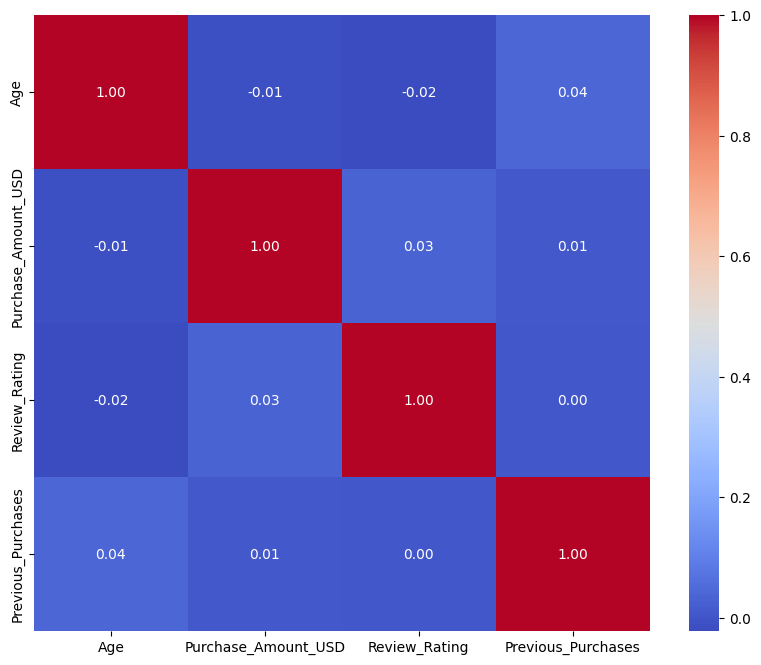

In [50]:
plt.figure(figsize=(10, 8))
fig = sns.heatmap(df[num_columns].corr(), annot=True, fmt=".2f", cmap ='coolwarm', square=True,)

# Final Insights

In [51]:
## While on average the women spend more per purchase than men, but men contribute more total in revenue.
## Fall is the most profitable season, while Summer is the least.
# While the credit card usage is the method with the higher purchase amount, the Venmo has more average purchase amount
## The Senior (50-75) age group is the most profitable age group, and the youth(0-24) is the least profitable one despite having the highest average purchase per customer
## Clothing category is the most in-demand category for both men and women
## Clothing is the most in demand category across all seasons, especially in Spring 
## Footwear demand increase in the Spring and Summer seasons
## Outerwear is the least in demand category across all seasons
# Moderate Visitors are the most valuable customers
# Frequent Visitors are the least contributors to the revenue
# The customers whose rating is satisfied and good spend more on average and total 
# The most number of customers falls in the good rating category

In [52]:
df.to_excel("Final_sheet.xlsx", index=False)